# Estudiante: Roy Chavarría Garita
## Semana #4

### Ejercicios
-Replicar lo visto en el video https://youtu.be/CYtLtIsdeSg

# Objetivos
- Implementar modelo en pytirch usando regresión logistica capaz de conocer imágenes
- Reconocer problemas de clasificación y de entrenamiento de un modelo
- Ejecutar el guardado y cargado de un modelo

# Imagen a utilizar
![](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


In [192]:
 !pip install numpy matplotlib torch torchvision

In [193]:
import torch
import torchvision
from torchvision.datasets import MNIST
 

Se descarga el dataset, contiene 60mil imágenes solo para entrenar al modelo, aparte existe 10k imágenes adicionales para evaluar el modelo.


In [194]:
dataset = MNIST(root='data/', download=True)

In [195]:
# Bandera train para indicar si queremos conjunto de entrenamiento o evaluación
test_dataset = MNIST(root='data/', train=False)
print(len(test_dataset))

10000


Ejemplo para mostrar par con input y target

In [196]:
dataset[0]
a,b = dataset[0]
print(a,b)

<PIL.Image.Image image mode=L size=28x28 at 0x7F2D220B3110> 5


In [197]:
import matplotlib.pyplot as plt
%matplotlib inline

<PIL.Image.Image image mode=L size=28x28 at 0x7F2D2223BE90> Etiqueta o número: 5


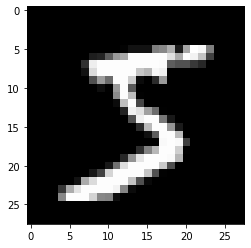

In [198]:
imagen, etiqueta = dataset[0]
print(imagen,"Etiqueta o número: "+str(etiqueta))
plt.imshow(imagen, cmap='gray')

Pytorch no traba con imagenes por lo que debemos de pasarlas a tensores

In [199]:
import torchvision.transforms  as transforms

In [200]:
# Mnist dataset (imagenes y etiquetas)
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())
imagen , etiqueta = dataset[0]
#print(imagen)

# Definicion de conjunto de datos

- Training: para entrenar al modelo
- Validation: para evaluar modelo durante el entrenamiento.
- Existe Test: comparar nuestro modelo con otro y ver que tan preciso es.

In [201]:
from torch.utils.data import random_split
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())
train_dataset, validation_dataset = random_split(dataset, [50000, 10000])

Creacion de dataloaders y datasetss

In [202]:
from torch.utils.data import DataLoader

batch_size = 128

train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size)

# Definición de modelo
 Usamos la funcion nn.linear()
 Recibe cantidad de elementos de input al modelo y otro parámetro que indica la cantidad de elementos a predecir

 Como lo de manzanas y naranjas, el primer parámetro son la cantidad de características y el segundo parámetro es la cantidad de respuestas a esas características (naranjas,manzanas)

In [203]:
import torch.nn as nn

#Pixeles
input_size = 1*28*28

# Numeros del 0 al 9
output_size = 10

# MOdelo de regresión
model = nn.Linear(input_size, output_size)

Model retorna pesos y sesgos asignados automaticamente


In [204]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0143,  0.0300, -0.0230,  ..., -0.0013, -0.0121,  0.0231],
        [ 0.0199,  0.0093, -0.0353,  ...,  0.0203, -0.0031, -0.0314],
        [ 0.0299,  0.0040,  0.0019,  ..., -0.0312,  0.0241,  0.0300],
        ...,
        [ 0.0201,  0.0110, -0.0277,  ..., -0.0018, -0.0035, -0.0236],
        [ 0.0325,  0.0077, -0.0180,  ...,  0.0155, -0.0250,  0.0089],
        [ 0.0092,  0.0316, -0.0181,  ..., -0.0292,  0.0220,  0.0213]],
       requires_grad=True)

In [205]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0275, -0.0270,  0.0298, -0.0092,  0.0131,  0.0216, -0.0023,  0.0139,
         0.0315,  0.0161], requires_grad=True)

El modelo espera un vector de 784 ya que el tamaño del input es de 1x28x28, pero la imagen es una matriz de 1x28x28 por esta razon se hace un reshape

In [206]:
imagen, etiqueta = train_dataset[0]
print(imagen.shape)
imagen = imagen.reshape(-1,784)
prediccion = model(imagen)
prediccion

torch.Size([1, 28, 28])


tensor([[ 0.2021, -0.2763,  0.3498, -0.1892,  0.2489, -0.0891, -0.0152,  0.0241,
          0.0438, -0.0445]], grad_fn=<AddmmBackward0>)

Aparte se puede hacer una clase propia que extiende de la clase nn.MOdule para poder modificar nuestro modlo a nuestro antojo y también poder hacer que se haga el reshape dentro

In [207]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.Linear = nn.Linear(input_size, output_size)
  
  def forward(self, imagen):
    imagen = imagen.reshape(-1,784)
    prediccion = self.Linear(imagen)
    return prediccion
model = Model()
imagen.etiqueta = train_dataset[0]
prediccion = model(imagen)
print(prediccion)

tensor([[-0.0005, -0.1056, -0.2664, -0.0235,  0.0289,  0.0042,  0.3203,  0.1522,
         -0.1198,  0.0003]], grad_fn=<AddmmBackward0>)


In [208]:
print(model.Linear.weight.shape, model.Linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0124, -0.0289,  0.0335,  ..., -0.0278, -0.0114,  0.0137],
         [-0.0140, -0.0354, -0.0030,  ..., -0.0199, -0.0060,  0.0146],
         [ 0.0147,  0.0223, -0.0260,  ...,  0.0228, -0.0132,  0.0008],
         ...,
         [-0.0117,  0.0295, -0.0047,  ...,  0.0279,  0.0294, -0.0291],
         [-0.0216, -0.0050, -0.0134,  ...,  0.0226, -0.0325,  0.0357],
         [ 0.0122, -0.0019,  0.0210,  ..., -0.0078,  0.0032,  0.0103]],
        requires_grad=True), Parameter containing:
 tensor([-0.0296, -0.0123,  0.0026,  0.0038, -0.0293,  0.0258,  0.0060,  0.0237,
          0.0143, -0.0117], requires_grad=True)]

La prediccion es una lista de de 10 numeros, debemos hacer que estos numeros sean la probabilidad de que ese numero sea el numero de la imagen

La funcion softmax convierte estos valores en probabilidades, para que nada mas tengamos que sacar el maximo valor que significaría el numero que es más probable que sea la imagen.

In [209]:
import torch.nn.functional as F

# Se aplica sofmax a las salidas
probabilidades = F.softmax(prediccion, dim=1)

maxima_probabilidad, numero = torch.max(probabilidades, dim=1)
print(numero)
print(maxima_probabilidad)

def predecir_imagen(predicciones):
  probabilidades = F.softmax(predicciones, dim=1)
  maxima_probabilidad, numero = torch.max(probabilidades, dim=1)
  return numero.item()  #saco el numero ya que variable es un tesor
print(predecir_imagen(prediccion))

tensor([6])
tensor([0.1363], grad_fn=<MaxBackward0>)
6


In [210]:
# Se define funcion de loss y creamos metrica de evaluación

import torch.nn.functional as F

loss_function = F.cross_entropy

for imagenes, etiqutas in train_dataloader:
  predicciones = model(imagenes)
  break

loss = loss_function(predicciones, etiqutas)
print(loss)

tensor(2.2947, grad_fn=<NllLossBackward0>)


In [211]:
# recibe preddicciones y etiquetas 128 y devuelve el porcentaje de las predicciones que están buenas

def accurancy(predicciones, etiquetas):
  _, numeros_predecidos = torch.max(predicciones, dim=1)
  return torch.tensor(torch.sum(numeros_predecidos == etiquetas).item() / len(numeros_predecidos))

# Entrenamiento del modelo
LO mismo que en videos anteriores, pero con un paso extra para validar el modelo con el conjunto de validación

In [215]:
def trainig(model,epochs, learning_rate, train_dataloader, validation_dataloader):
  optimizer = torch.optim.SGD(model.parameters(), learning_rate)

  for epoch in range(epochs):
    #Fase de entrenamiento
    for batch in train_dataloader:

      #genero predicciones
      imagenes, etiquetas = batch
      predicciones = model(imagenes)
      loss = F.cross_entropy(predicciones, etiquetas)

      #calculo de gradiente
      loss.backward()

      #ajusto pesos y sesgos
      optimizer.step()

    for batch in validation_dataloader:
      imagenes, etiquetas = batch
      predicciones = model(imagenes)
      loss = F.cross_entropy(predicciones, etiquetas)
      acc = accurancy(predicciones, etiquetas)

    print("Loss: "+str(loss)+"Acurrancy: "+str(acc))

In [216]:
trainig(model,5,0.05, train_dataloader, validation_dataloader)

Loss: tensor(1.8310, grad_fn=<NllLossBackward0>)Acurrancy: tensor(0.8125)
Loss: tensor(4.3023, grad_fn=<NllLossBackward0>)Acurrancy: tensor(0.8125)
Loss: tensor(3.6058, grad_fn=<NllLossBackward0>)Acurrancy: tensor(0.8125)
Loss: tensor(5.6528, grad_fn=<NllLossBackward0>)Acurrancy: tensor(0.8125)
Loss: tensor(1.1636, grad_fn=<NllLossBackward0>)Acurrancy: tensor(0.9375)


# Probar la prediccion de imagenes

Etiquetas 1 Imagen preecida por el modelo:  1


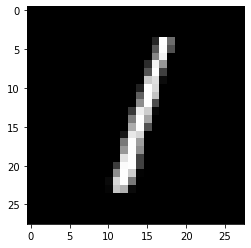

In [219]:
from matplotlib import test
#defino dataset para leer imagenes
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

#agarro una de las imagenes con su etiqueta
imagen, etiqueta = test_dataset[2]
plt.imshow(imagen[0], cmap='gray')

imagen = imagen.unsqueeze(0)
predicciones = model(imagen)
print("Etiquetas", etiqueta, "Imagen preecida por el modelo: ", predecir_imagen(predicciones))